In [11]:
using MPSTime
using Random
using Plots
using PrettyTables

rng = Xoshiro(1)

opts = MPSOptions(d = 3, chi_max = 20, sigmoid_transform = false)

ntimepoints = 100
ntrain_instances = 1000
ntest_instances = 400
period = 100
sigma = 0.1;

In [12]:
X_train, _ = trendy_sine(ntimepoints, ntrain_instances; sigma = sigma, rng = rng,slope = 0, period = period);
X_test, _ = trendy_sine(ntimepoints, ntest_instances; sigma = sigma, rng = rng,slope = 0);

(1000, 100)

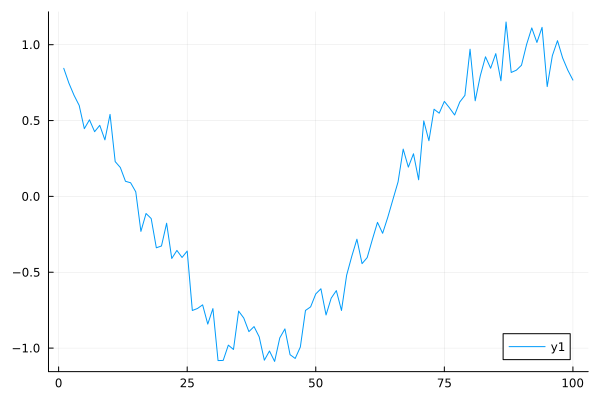

In [13]:
print(size(X_train))
plot(X_train[2,:])

In [4]:
mps, info, test_states = fitMPS(X_train, opts);

Generating initial weight MPS with bond dimension χ_init = 4
        using random state 1234.
Initialising train states.
Using 1 iterations per update.
Training KL Div. 11.854724136061165 | Training acc. 1.0.
Using optimiser CustomGD with the "TSGO" algorithm
Starting backward sweeep: [1/5]
Backward sweep finished.
Starting forward sweep: [1/5]
Finished sweep 1. Time for sweep: 200.0s
Training KL Div. 8.826773405915398 | Training acc. 1.0.
Using optimiser CustomGD with the "TSGO" algorithm
Starting backward sweeep: [2/5]
Backward sweep finished.
Starting forward sweep: [2/5]
Finished sweep 2. Time for sweep: 4.2s
Training KL Div. 6.826685275233656 | Training acc. 1.0.
Using optimiser CustomGD with the "TSGO" algorithm
Starting backward sweeep: [3/5]
Backward sweep finished.
Starting forward sweep: [3/5]
Finished sweep 3. Time for sweep: 3.99s
Training KL Div. 5.6342198307268285 | Training acc. 1.0.
Using optimiser CustomGD with the "TSGO" algorithm
Starting backward sweeep: [4/5]
Backw

In [5]:
class = 0
instance_idx = 10
impute_sites = [ntimepoints]
method = :median
imp = init_imputation_problem(mps,X_test);

Initialising train states.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 1000 training samples and 400 testing samples.
Slicing MPS into individual states...
 - 1 class(es) were detected.
 - Time independent encoding - Legendre - detected.
 - d = 3, chi_max = 20
Re-encoding the training data to get the encoding arguments...

 Created 1 ImputationProblem struct(s) containing class-wise mps and test samples.


In [6]:
imputed_ts, pred_err, target_ts, stats, nice_plots = MPS_impute(imp, class, instance_idx, impute_sites, method; plot_fits = true);

In [7]:
pretty_table(stats[1]; header = ["Metric", "Value"], header_crayon = crayon"yellow bold", tf = tf_unicode_rounded)

╭─────────┬───────────╮
│  Metric │     Value │
├─────────┼───────────┤
│     MAE │   0.10439 │
│    MAPE │  0.118707 │
│  NN_MAE │ 0.0935988 │
│ NN_MAPE │  0.106436 │
╰─────────┴───────────╯


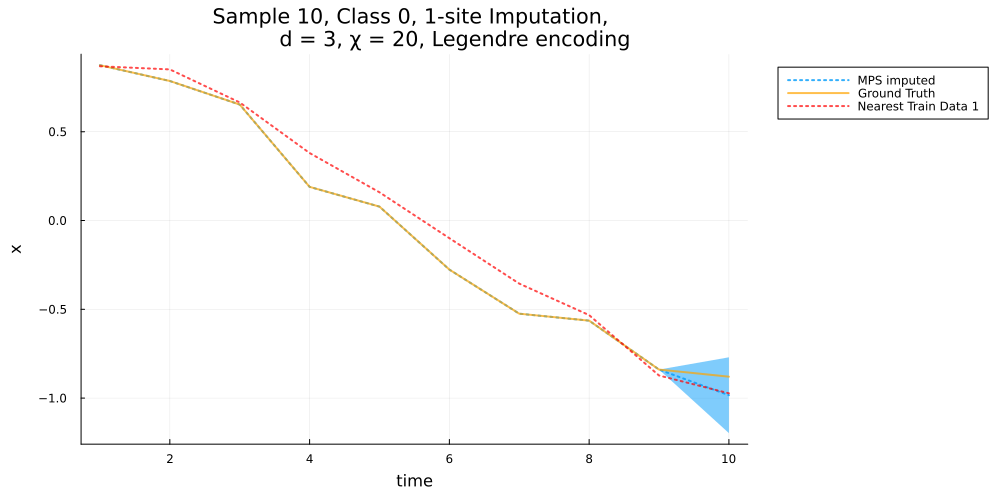

In [8]:
plot(nice_plots...)